# Introduction
Melbourne's house prices has been soaring rapidly. In 2014, foreign investment in Melbourne's residential properties account for 14% of sales, and resulted in a 5% rise in house prices in 2015. Australia Government made efforts to tackle foreign investments such as implementing reselling limits and taxes to mitigate the effects of the quick rising house prices. Also, the introduction to new technology such as Airbnb for short rentals poses a threat to the traditional house market as the demand for houses that are convenient in most aspects become the prime target for short rental house owners. 

The purpose of this study is to evaluate whether the house prices in Melbourne are predictable, and finding factors that contribute to a pricey houes, so that authorities can make corresponding responses to the situation.

# Literature Review
Tamarai and Malarvizhi (2020) used decision tree regression and multivariant linear regression to predict the house prices in Tadepalligudem, India. They also produced a decision tree to classify whether the requirements proposed by a user is available or not. The economy situation of Australia also creates an attractive environment to buyers, with a low interest rate and high loan approval rates, foreign investors gain huge confidence in buying houses for investment purposes instead of inhabitation. This could be a reason why the house price surge so fast and made locals face difficulties in buying homes. 

# Research Question
 1. RQ1: What are the factors that affect house prices in Melbourne? 
 2. RQ2: What are the main influencers of pricey houses?

# Presentation of Data 
The dataset used is about the house prices of Melbourne, found on [Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot). The dataset contains around 13,000 records, about the selling prices of houses from 2016-2017 and the houses' features such as bedrooms, location, distance from central business district etc. The first step will be to clean the data, removing rows that have no data or null value. After that, columns that do not fit the task will be removed (postcode, location, suburb name), and then the whole set will be split into 2 sets for classification tasks. For regression tasks, the set will not be split.

# Methodology
In this study, there are 2 objectives, to predict the house price and classify whether the price of a house given its attributes can be sold at a high price or not.

We will first do regression task to see if the house prices are predictable or not. Before that, we need to consider multicollinearity between the independent variables. A high correlation between variables will lead to a less accurate model. VIF will be used to eliminate the unusable variables before we perform multivariable linear regression. Also, random forest regressor will be used for the task, the performance between linear regression and random forest regressor will be compared.

After that, we will move on to do classification. According to the boxplot created to see the price distribution, the **75th percentile** price of the houses sold is selected as the benchmark for pricey houses. K-means neighborhood, decision tree and random forest will be used to produce 3 models, `GridSearchCV` is used to find the optimal parameters for the models. Lastly, the performance of the 3 models will be compared.

## Data Preprocessing
Firstly, we will check for NAN values, 3 columns "Building Area", "Year built" and "Council Area" contains nan values, especially in column building area that has over 6000 nan rows. Though this study do not intend to do spatial analysis, the location codes are kept because they can still be grouped for classification tasks. All rows with nan values will be erased for now, the resulting dataframe only contains 6700 rows.






In [1]:
#utility function to calculate runtime
import time
start_time = time.time()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

pd.set_option('display.max_rows', 400) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format
%matplotlib inline

import statsmodels.api as sm

In [3]:
original_data = pd.read_csv("https://raw.githubusercontent.com/sophie-sdsv/qm_final/main/melb_data.csv")
original_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.0000",S,Biggin,3/12/2016,2.5000,"3,067.0000",...,1.0000,1.0000,202.0000,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,"4,019.0000"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.0000",S,Biggin,4/02/2016,2.5000,"3,067.0000",...,1.0000,0.0000,156.0000,79.0000,"1,900.0000",Yarra,-37.8079,144.9934,Northern Metropolitan,"4,019.0000"
2,Abbotsford,5 Charles St,3,h,"1,465,000.0000",SP,Biggin,4/03/2017,2.5000,"3,067.0000",...,2.0000,0.0000,134.0000,150.0000,"1,900.0000",Yarra,-37.8093,144.9944,Northern Metropolitan,"4,019.0000"
3,Abbotsford,40 Federation La,3,h,"850,000.0000",PI,Biggin,4/03/2017,2.5000,"3,067.0000",...,2.0000,1.0000,94.0000,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,"4,019.0000"
4,Abbotsford,55a Park St,4,h,"1,600,000.0000",VB,Nelson,4/06/2016,2.5000,"3,067.0000",...,1.0000,2.0000,120.0000,142.0000,"2,014.0000",Yarra,-37.8072,144.9941,Northern Metropolitan,"4,019.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,"1,245,000.0000",S,Barry,26/08/2017,16.7000,"3,150.0000",...,2.0000,2.0000,652.0000,NaN,"1,981.0000",NaN,-37.9056,145.1676,South-Eastern Metropolitan,"7,392.0000"
13576,Williamstown,77 Merrett Dr,3,h,"1,031,000.0000",SP,Williams,26/08/2017,6.8000,"3,016.0000",...,2.0000,2.0000,333.0000,133.0000,"1,995.0000",NaN,-37.8593,144.8790,Western Metropolitan,"6,380.0000"
13577,Williamstown,83 Power St,3,h,"1,170,000.0000",S,Raine,26/08/2017,6.8000,"3,016.0000",...,2.0000,4.0000,436.0000,NaN,"1,997.0000",NaN,-37.8527,144.8874,Western Metropolitan,"6,380.0000"
13578,Williamstown,96 Verdon St,4,h,"2,500,000.0000",PI,Sweeney,26/08/2017,6.8000,"3,016.0000",...,1.0000,5.0000,866.0000,157.0000,"1,920.0000",NaN,-37.8591,144.8930,Western Metropolitan,"6,380.0000"


In [4]:
original_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
#check for NAN values
original_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
#convert date column to datetime format
import datetime as dt
original_data['Date']=pd.to_datetime(original_data['Date'], format='%d/%m/%Y')

#rename a column
original_data.rename(columns = {'Bedroom2': 'Bedroom'}, inplace = True)

In [7]:
#extract year, month, day from the full date
original_data['Year']=original_data['Date'].dt.year
original_data['Month']=original_data['Date'].dt.month
original_data['Day']=original_data['Date'].dt.day

#calculate building age
original_data['BuildingAge']=original_data.Year - original_data.YearBuilt

In [8]:
original_data.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,BuildingAge
13436,Glenroy,80 Paget Av,2,h,"725,000.0000",S,Stockdale,2017-08-26,11.2000,"3,046.0000",...,NaN,NaN,-37.6993,144.9256,Northern Metropolitan,"8,870.0000",2017,8,26,NaN
5449,Rosanna,70 McCrae Rd,3,h,"780,000.0000",S,Barry,2017-02-11,11.4000,"3,084.0000",...,"1,970.0000",Banyule,-37.7367,145.0797,Eastern Metropolitan,"3,540.0000",2017,2,11,47.0000
6450,Watsonia,4 Ananda Ct,3,h,"711,000.0000",S,Barry,2016-05-14,14.9000,"3,087.0000",...,NaN,Banyule,-37.7147,145.0752,Northern Metropolitan,"2,329.0000",2016,5,14,NaN


In [9]:
original_data.YearBuilt.describe()

count                                 8,205.0000
mean                                  1,964.6842
std                                      37.2738
min                                   1,196.0000
25%                                   1,940.0000
50%                                   1,970.0000
75%                                   1,999.0000
max                                   2,018.0000
Name: YearBuilt, dtype: float64

In [10]:
original_data[original_data.BuildingAge > 0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,BuildingAge
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.0000",S,Biggin,2016-02-04,2.5000,"3,067.0000",...,"1,900.0000",Yarra,-37.8079,144.9934,Northern Metropolitan,"4,019.0000",2016,2,4,116.0000
2,Abbotsford,5 Charles St,3,h,"1,465,000.0000",SP,Biggin,2017-03-04,2.5000,"3,067.0000",...,"1,900.0000",Yarra,-37.8093,144.9944,Northern Metropolitan,"4,019.0000",2017,3,4,117.0000
4,Abbotsford,55a Park St,4,h,"1,600,000.0000",VB,Nelson,2016-06-04,2.5000,"3,067.0000",...,"2,014.0000",Yarra,-37.8072,144.9941,Northern Metropolitan,"4,019.0000",2016,6,4,2.0000
6,Abbotsford,124 Yarra St,3,h,"1,876,000.0000",S,Nelson,2016-05-07,2.5000,"3,067.0000",...,"1,910.0000",Yarra,-37.8024,144.9993,Northern Metropolitan,"4,019.0000",2016,5,7,106.0000
7,Abbotsford,98 Charles St,2,h,"1,636,000.0000",S,Nelson,2016-10-08,2.5000,"3,067.0000",...,"1,890.0000",Yarra,-37.8060,144.9954,Northern Metropolitan,"4,019.0000",2016,10,8,126.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,"1,245,000.0000",S,Barry,2017-08-26,16.7000,"3,150.0000",...,"1,981.0000",NaN,-37.9056,145.1676,South-Eastern Metropolitan,"7,392.0000",2017,8,26,36.0000
13576,Williamstown,77 Merrett Dr,3,h,"1,031,000.0000",SP,Williams,2017-08-26,6.8000,"3,016.0000",...,"1,995.0000",NaN,-37.8593,144.8790,Western Metropolitan,"6,380.0000",2017,8,26,22.0000
13577,Williamstown,83 Power St,3,h,"1,170,000.0000",S,Raine,2017-08-26,6.8000,"3,016.0000",...,"1,997.0000",NaN,-37.8527,144.8874,Western Metropolitan,"6,380.0000",2017,8,26,20.0000
13578,Williamstown,96 Verdon St,4,h,"2,500,000.0000",PI,Sweeney,2017-08-26,6.8000,"3,016.0000",...,"1,920.0000",NaN,-37.8591,144.8930,Western Metropolitan,"6,380.0000",2017,8,26,97.0000


In [11]:
original_data.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Year',
       'Month', 'Day', 'BuildingAge'], dtype=object)

In [12]:
filtered = original_data[['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Propertycount','Lattitude', 'Longtitude', 'Year',
       'Month', 'Day', 'BuildingAge']]

In [13]:
filtered = filtered[(filtered['BuildingAge'] > 0) & (filtered['BuildingArea'] > 0) & (filtered['Car'] >=  0) ]

In [14]:
filtered.shape

(6772, 18)

In [15]:
filtered.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Propertycount    0
Lattitude        0
Longtitude       0
Year             0
Month            0
Day              0
BuildingAge      0
dtype: int64

In [16]:
filtered.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
Distance         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
Propertycount    float64
Lattitude        float64
Longtitude       float64
Year               int64
Month              int64
Day                int64
BuildingAge      float64
dtype: object

The dataset is now clear of unwanted rows and contains 6700 records. Next, we will look into the Price column and set up columns for classification purposes. To do this, we first set up a new column called 'overpriced' and set the calculation to above mean price, and then Label Encoder will be used to change the True False labels to 1 and 0, making it machine redable.

In [17]:
filtered.Price.describe()

count                                 6,772.0000
mean                              1,074,658.1270
std                                 671,375.0624
min                                 131,000.0000
25%                                 630,000.0000
50%                                 890,000.0000
75%                               1,330,000.0000
max                               9,000,000.0000
Name: Price, dtype: float64

In [18]:
#after filtering, check price avg
np.mean(filtered.Price)

1074658.1269935027

<AxesSubplot:xlabel='Price'>

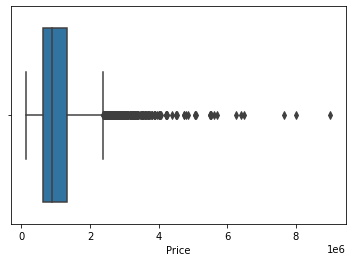

In [19]:
sns.boxplot(data=filtered, x = 'Price')

We have quite a lot of outliers for the price, this means the houses sold contains quite some expensive houses, but it does not imply the price is overpriced. Next step will be finding whether a house's selling price is categorized as expensive property or not. The property will be labelled as pricey if the price is above the 75th percentile selling price.

In [20]:
a = pd.DataFrame({'expensive':filtered['Price']>=np.percentile(filtered['Price'],75)})
a

,expensive
1,False
2,True
4,True
6,True
7,True
...,...
13572,False
13573,False
13576,False
13578,True


In [21]:
filtered.columns.values

array(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance',
       'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'Propertycount', 'Lattitude', 'Longtitude', 'Year', 'Month', 'Day',
       'BuildingAge'], dtype=object)

In [22]:
b = pd.concat( [filtered, a], axis = 1)
b

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount,Lattitude,Longtitude,Year,Month,Day,BuildingAge,expensive
1,Abbotsford,2,h,"1,035,000.0000",S,2.5000,2.0000,1.0000,0.0000,156.0000,79.0000,"4,019.0000",-37.8079,144.9934,2016,2,4,116.0000,False
2,Abbotsford,3,h,"1,465,000.0000",SP,2.5000,3.0000,2.0000,0.0000,134.0000,150.0000,"4,019.0000",-37.8093,144.9944,2017,3,4,117.0000,True
4,Abbotsford,4,h,"1,600,000.0000",VB,2.5000,3.0000,1.0000,2.0000,120.0000,142.0000,"4,019.0000",-37.8072,144.9941,2016,6,4,2.0000,True
6,Abbotsford,3,h,"1,876,000.0000",S,2.5000,4.0000,2.0000,0.0000,245.0000,210.0000,"4,019.0000",-37.8024,144.9993,2016,5,7,106.0000,True
7,Abbotsford,2,h,"1,636,000.0000",S,2.5000,2.0000,1.0000,2.0000,256.0000,107.0000,"4,019.0000",-37.8060,144.9954,2016,10,8,126.0000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,2,h,"650,000.0000",PI,14.5000,2.0000,1.0000,1.0000,210.0000,79.0000,"2,329.0000",-37.7066,145.0788,2017,8,26,11.0000,False
13573,Werribee,4,h,"635,000.0000",S,14.7000,4.0000,2.0000,1.0000,662.0000,172.0000,"16,166.0000",-37.8933,144.6479,2017,8,26,37.0000,False
13576,Williamstown,3,h,"1,031,000.0000",SP,6.8000,3.0000,2.0000,2.0000,333.0000,133.0000,"6,380.0000",-37.8593,144.8790,2017,8,26,22.0000,False
13578,Williamstown,4,h,"2,500,000.0000",PI,6.8000,4.0000,1.0000,5.0000,866.0000,157.0000,"6,380.0000",-37.8591,144.8930,2017,8,26,97.0000,True


In [23]:
b['expensive'].value_counts()

False    5072
True     1700
Name: expensive, dtype: int64

In [24]:
#preparing the dataset for splitting
#labelling the overpriced column
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit([True, False])
labels_fea = le.transform(b['expensive'])

In [26]:
pd.Series(labels_fea).value_counts()

0    5072
1    1700
dtype: int64

In [27]:
#vectorize data into dictionary
from sklearn.feature_extraction import DictVectorizer

In [28]:
A = b.drop(['Price','expensive'],axis = 1)
y = filtered['Price']

In [29]:
A_dict = A.to_dict('records')
print(A_dict[1])

{'Suburb': 'Abbotsford', 'Rooms': 3, 'Type': 'h', 'Method': 'SP', 'Distance': 2.5, 'Bedroom': 3.0, 'Bathroom': 2.0, 'Car': 0.0, 'Landsize': 134.0, 'BuildingArea': 150.0, 'Propertycount': 4019.0, 'Lattitude': -37.8093, 'Longtitude': 144.9944, 'Year': 2017, 'Month': 3, 'Day': 4, 'BuildingAge': 117.0}


In [30]:
vec = DictVectorizer()  # create the DictVectorizer object
A_vec_array = vec.fit_transform(A_dict).toarray()
A_vec_array.shape

(6772, 322)

In [31]:
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['Bathroom', 'Bedroom', 'BuildingAge', 'BuildingArea', 'Car']
{'Suburb=Abbotsford': 18, 'Rooms': 17, 'Type=h': 318, 'Method=S': 11, 'Distance': 6, 'Bedroom': 1, 'Bathroom': 0, 'Car': 4, 'Landsize': 7, 'BuildingArea': 3, 'Propertycount': 16, 'Lattitude': 8, 'Longtitude': 9, 'Year': 321, 'Month': 15, 'Day': 5, 'BuildingAge': 2, 'Method=SP': 13, 'Method=VB': 14, 'Type=u': 320, 'Method=PI': 10, 'Suburb=Airport West': 20, 'Type=t': 319, 'Suburb=Albert Park': 22, 'Suburb=Alphington': 24, 'Suburb=Altona': 25, 'Suburb=Altona North': 27, 'Suburb=Armadale': 29, 'Suburb=Ascot Vale': 30, 'Suburb=Ashburton': 31, 'Suburb=Ashwood': 32, 'Suburb=Avondale Heights': 34, 'Suburb=Balaclava': 35, 'Suburb=Balwyn': 36, 'Method=SA': 12, 'Suburb=Balwyn North': 37, 'Suburb=Bentleigh': 44, 'Suburb=Bentleigh East': 45, 'Suburb=Box Hill': 53, 'Suburb=Braybrook': 54, 'Suburb=Brighton': 56, 'Suburb=Brighton East': 57, 'Suburb=Brunswick': 61, 'Suburb=Brunswick West': 63, 'Suburb=Bulleen': 64, 'Suburb=Burwood': 69, 'Su

In [32]:
#Split data using scikit learn function
from sklearn.model_selection import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(A_vec_array, labels_fea)

In [33]:
print(train_d.shape)
print(test_d.shape)

(5079, 322)
(1693, 322)


In [34]:
len(train_d),len(test_d),len(train_lab),len(test_lab)

(5079, 1693, 5079, 1693)

We will plot the property locations to the map for now to see where the labelled expensive properties are located at.

In [35]:
b1 = b.copy()
gdf = gpd.GeoDataFrame(b1, geometry=gpd.points_from_xy(b1.Longtitude, b1.Lattitude, crs='epsg:4326'))

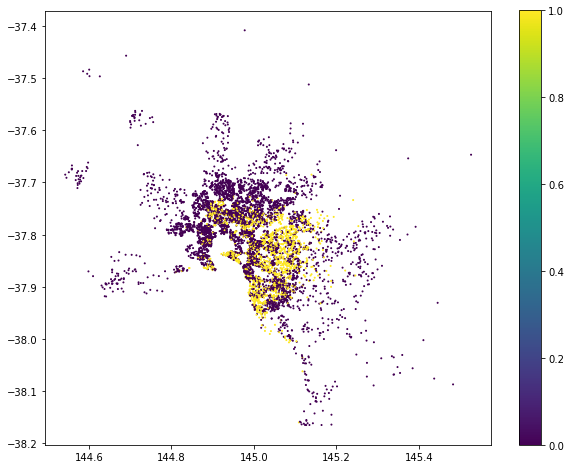

In [36]:
ax=gdf.plot(column='expensive', legend=True, markersize=1 ,figsize=(10,8))

In [37]:
#preprocessing for regression purposes
#creating dummies to the set to avoid categorical values raising error during the process

reg_df = filtered.drop(['Suburb'], axis = 1)

In [38]:
filtered_numeric = pd.get_dummies(reg_df)

In [39]:
filtered_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 1 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6772 non-null   int64  
 1   Price          6772 non-null   float64
 2   Distance       6772 non-null   float64
 3   Bedroom        6772 non-null   float64
 4   Bathroom       6772 non-null   float64
 5   Car            6772 non-null   float64
 6   Landsize       6772 non-null   float64
 7   BuildingArea   6772 non-null   float64
 8   Propertycount  6772 non-null   float64
 9   Lattitude      6772 non-null   float64
 10  Longtitude     6772 non-null   float64
 11  Year           6772 non-null   int64  
 12  Month          6772 non-null   int64  
 13  Day            6772 non-null   int64  
 14  BuildingAge    6772 non-null   float64
 15  Type_h         6772 non-null   uint8  
 16  Type_t         6772 non-null   uint8  
 17  Type_u         6772 non-null   uint8  
 18  Method_

In [40]:
filtered_numeric.columns.values

array(['Rooms', 'Price', 'Distance', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Propertycount', 'Lattitude',
       'Longtitude', 'Year', 'Month', 'Day', 'BuildingAge', 'Type_h',
       'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB'], dtype=object)

In [41]:
filtered_numeric_fil = filtered_numeric.drop(['Type_u','Method_VB'], axis = 1)
filtered_numeric_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 1 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6772 non-null   int64  
 1   Price          6772 non-null   float64
 2   Distance       6772 non-null   float64
 3   Bedroom        6772 non-null   float64
 4   Bathroom       6772 non-null   float64
 5   Car            6772 non-null   float64
 6   Landsize       6772 non-null   float64
 7   BuildingArea   6772 non-null   float64
 8   Propertycount  6772 non-null   float64
 9   Lattitude      6772 non-null   float64
 10  Longtitude     6772 non-null   float64
 11  Year           6772 non-null   int64  
 12  Month          6772 non-null   int64  
 13  Day            6772 non-null   int64  
 14  BuildingAge    6772 non-null   float64
 15  Type_h         6772 non-null   uint8  
 16  Type_t         6772 non-null   uint8  
 17  Method_PI      6772 non-null   uint8  
 18  Method_

## Regression (VIF)

Before doing any fancy regression, let's see the preliminary score of linear regression without removing any columns. Then move on to removing variables with high multicollinearity using VIF. Since both linear regression models did not perform very well, random forest regressor is added.

In [42]:
#setting up 2 part data to feed in
predictors_df = filtered_numeric_fil.drop('Price', axis=1)
response_df = filtered_numeric_fil['Price']

In [43]:
regressor_OLS = sm.OLS(endog=response_df, exog=sm.add_constant(predictors_df)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     530.1
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:37:50   Log-Likelihood:                -97272.
No. Observations:                6772   AIC:                         1.946e+05
Df Residuals:                    6751   BIC:                         1.947e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.121e+08   2.57e+07    -12.124      0.000   -3.63e+08   -2.62e+08
Rooms          1.206e+05   1.87e+04      6.433      0.000    8.39e+04    1.57e+05
Distance      -4.032e+04   1052.175    -38.323      0.000   -4.24e+04   -3.83e+04
Bedroom       -2302.0276   1.85e+04     -0.124      0.901   -3.86e+04     3.4e+04
Bathroom       2.182e+05   1.01e+04     21.670      0.000    1.98e+05    2.38e+05
Car            5.239e+04   6160.120      8.504      0.000    4.03e+04    6.45e+04
Landsize         23.3997      5.670      4.127      0.000      12.284      34.515
BuildingArea   1728.8385     75.378     22.935      0.000    1581.073    1876.604
Propertycount    -0.7847      1.189     -0.660      0.509      -3.116       1.546
Lattitude     -1.558e+06   7.05e+04    -22.111      0.000    -1.7e+06   -1.42e+06
Longtitude      8.93e+05   5.39e+04     16.556      0.000    7.87e+05    9.99e+05
Year           6.133e+04   1.22e+04      5.012      0.000    3.73e+04    8.53e+04
Month          9866.5112   2303.004      4.284      0.000    5351.897    1.44e+04
Day            -534.5507    606.985     -0.881      0.379   -1724.432     655.331
BuildingAge    3395.1322    170.684     19.891      0.000    3060.537    3729.727
Type_h         2.899e+05   1.71e+04     16.941      0.000    2.56e+05    3.23e+05
Type_t         1.302e+05    2.1e+04      6.206      0.000    8.91e+04    1.71e+05
Method_PI     -2.671e+04   2.27e+04     -1.178      0.239   -7.11e+04    1.77e+04
Method_S       2.485e+04   1.86e+04      1.339      0.181   -1.15e+04    6.12e+04
Method_SA     -5.817e+04   6.64e+04     -0.876      0.381   -1.88e+05    7.19e+04
Method_SP      -3.74e+04    2.2e+04     -1.697      0.090   -8.06e+04    5814.970
==============================================================================
Omnibus:                     5256.624   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           422921.813
Skew:                           3.108   Prob(JB):                         0.00
Kurtosis:                      41.213   Cond. No.                     4.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
There are many problems with the model right now, a low R2 score of 0.546, very high condition number (implying high multicollinearity, some independent variables having an especially high p-value. The next step is to try to use VIF to eliminate the multicollinearity problem, and hopefully remove the insignificant variables in the progress.

---

In [44]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [45]:
#select columns to keep even if they have super high VIF score
list_var_not_to_remove = ['Type_h', 'Type_t', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP']
df_predictors_select_VIF = drop_column_using_vif_(predictors_df, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 12.745901866683914
Dropping: Rooms
Max VIF: 2.635720879632536
Dropping: Bedroom
Max VIF: 1.599848834831253
The columns remaining after VIF selection are:
Index(['Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'Propertycount', 'Lattitude', 'Longtitude', 'Year', 'Month', 'Day',
       'BuildingAge', 'Type_h', 'Type_t', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP'],
      dtype='object')


VIF decided to drop `number of rooms` and `number of bedrooms`, which is acceptable from a statistical viewpoint but irrational to solve our research question.

In [46]:
#let's do linear regression again
regressor_OLS = sm.OLS(endog=response_df, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     563.0
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:37:50   Log-Likelihood:                -97366.
No. Observations:                6772   AIC:                         1.948e+05
Df Residuals:                    6753   BIC:                         1.949e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.174e+08    2.6e+07    -12.229      0.000   -3.68e+08   -2.67e+08
Distance      -3.803e+04   1052.394    -36.140      0.000   -4.01e+04    -3.6e+04
Bathroom       2.757e+05   9186.020     30.015      0.000    2.58e+05    2.94e+05
Car            6.531e+04   6162.879     10.598      0.000    5.32e+04    7.74e+04
Landsize         25.2166      5.746      4.388      0.000      13.952      36.481
BuildingArea   2036.3844     72.959     27.911      0.000    1893.361    2179.408
Propertycount    -1.4791      1.204     -1.228      0.219      -3.840       0.882
Lattitude     -1.514e+06   7.13e+04    -21.225      0.000   -1.65e+06   -1.37e+06
Longtitude     8.996e+05   5.47e+04     16.454      0.000    7.92e+05    1.01e+06
Year           6.437e+04   1.23e+04      5.222      0.000    4.02e+04    8.85e+04
Month          1.009e+04   2329.620      4.333      0.000    5527.667    1.47e+04
Day            -331.6170    614.799     -0.539      0.590   -1536.816     873.582
BuildingAge    3587.3778    172.407     20.808      0.000    3249.406    3925.349
Type_h         3.733e+05   1.62e+04     23.051      0.000    3.42e+05    4.05e+05
Type_t         1.739e+05    2.1e+04      8.272      0.000    1.33e+05    2.15e+05
Method_PI     -2.928e+04    2.3e+04     -1.274      0.203   -7.43e+04    1.58e+04
Method_S       2.117e+04   1.88e+04      1.125      0.260   -1.57e+04     5.8e+04
Method_SA     -6.572e+04   6.73e+04     -0.977      0.329   -1.98e+05    6.62e+04
Method_SP     -4.342e+04   2.23e+04     -1.943      0.052   -8.72e+04     375.723
==============================================================================
Omnibus:                     4974.290   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           417581.965
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      41.053   Cond. No.                     4.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#VIF did not solve much so we can try removing the high p value columns and test again
new_predictor = df_predictors_select_VIF.drop(['Propertycount','Day','Method_PI', 'Method_S', 'Method_SA', 'Method_SP'], axis=1)

In [48]:
#let's do linear regression again
regressor_OLS = sm.OLS(endog=response_df, exog=sm.add_constant(new_predictor)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     839.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:37:50   Log-Likelihood:                -97379.
No. Observations:                6772   AIC:                         1.948e+05
Df Residuals:                    6759   BIC:                         1.949e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.183e+08   2.59e+07    -12.290      0.000   -3.69e+08   -2.68e+08
Distance     -3.786e+04   1045.286    -36.216      0.000   -3.99e+04   -3.58e+04
Bathroom      2.742e+05   9165.177     29.920      0.000    2.56e+05    2.92e+05
Car            6.47e+04   6167.482     10.490      0.000    5.26e+04    7.68e+04
Landsize        25.5134      5.751      4.436      0.000      14.239      36.788
BuildingArea  2040.6483     72.997     27.955      0.000    1897.551    2183.746
Lattitude    -1.513e+06   7.11e+04    -21.278      0.000   -1.65e+06   -1.37e+06
Longtitude    9.106e+05   5.43e+04     16.778      0.000    8.04e+05    1.02e+06
Year          6.403e+04   1.23e+04      5.205      0.000    3.99e+04    8.81e+04
Month         1.056e+04   2296.809      4.598      0.000    6058.028    1.51e+04
BuildingAge   3613.8257    172.558     20.943      0.000    3275.559    3952.093
Type_h         3.79e+05   1.61e+04     23.510      0.000    3.47e+05    4.11e+05
Type_t        1.802e+05    2.1e+04      8.585      0.000    1.39e+05    2.21e+05
==============================================================================
Omnibus:                     4949.149   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           406640.231
Skew:                           2.807   Prob(JB):                         0.00
Kurtosis:                      40.545   Cond. No.                     1.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

Model | R2 
:---: | :---: |
OLS (no VIF) | 0.611
OLS (VIF) | 0.6
OLS (high p-value removed) | 0.599


All 3 linear regression models did not perform very well, they all have a R2 of around 0.6 which is far from good because it means the model can only explain around 60% of the variables. Also, from the high condition number, the problem with multicollinearity is severe even when VIF and removing variables with a high p-value are implemented. In this case, maybe linear regression is not the good fit for this dataset, ie. the relationship between the independent and response variable is not linear, and therefore we introduce random forest regressor. 

## Random forest regressor

In [49]:
RF_train_d, RF_test_d, RF_train_lab, RF_test_lab = train_test_split(predictors_df, response_df)

In [50]:
#from sklearn.metrics import mean_absolute_error
#val_predictions = rf_reg.predict(RF_test_d)
#print(mean_absolute_error(RF_test_lab, val_predictions))

In [51]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

#function to evaluate model performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels) #this is the MAE
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#evaluate the base model first
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(RF_train_d, RF_train_lab)
base_accuracy = evaluate(base_model, RF_test_d, RF_test_lab)

Model Performance
Average Error: 172016.1375 degrees.
Accuracy = 83.58%.


In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'max_features': [3,4,5,6,7],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [53]:
#grid_search.fit(RF_train_d, RF_train_lab)
#grid_search.best_params_

It costs too much time for the computer to run the code above, the output from my computer: 

`Fitting 3 folds for each of 80 candidates, totalling 240 fits`

`{'bootstrap': True, 'max_depth': 20, 'max_features': 7, 'n_estimators': 1000}`

In [54]:
best_grid = RandomForestRegressor(max_depth=20, max_features=7, n_estimators=1000)
best_grid.fit(RF_train_d, RF_train_lab)
grid_accuracy = evaluate(best_grid, RF_test_d, RF_test_lab)

Model Performance
Average Error: 156182.3791 degrees.
Accuracy = 84.92%.


In [55]:
feature_importances_rfreg = pd.DataFrame(best_grid.feature_importances_,
                                  index= predictors_df.columns.values,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rfreg.head(10)

,importance
BuildingArea,0.2347
Lattitude,0.1158
Distance,0.1098
BuildingAge,0.1042
Longtitude,0.0879
Landsize,0.0656
Rooms,0.0614
Bathroom,0.0448
Bedroom,0.0447
Type_h,0.0424


Random forest regressor produced a result of 84.86% accuracy, it selected **building area, distance from CBD, building age and geographical location code** as the most important feature. 

After using `GridSearchCV` to search for optimal parameters and refined the model, its accuracy raised by 1.5% to 85%. 85% sounds like a good score, but the mean absolute error (MAE) of out-of-sample is **\\$165,057**, which means the price prediction has a range of $165,057 from the actual price, this makes the model unsuitable for real-world usage.

Random forest outperformed linear regression, which means this dataset has far too many features that linear regression does not fit well in, but overall both approaches do not make a practical model to correctly predict the house price in Melbourne. 

In [56]:
#this dataframe will be used for comparing later
#feature_importances_rfreg['model'] = 'RF_Reg'
#feature_importances_rfreg['score'] = rf_reg.score(predictors_df, response_df)
#feature_importances_rfreg = feature_importances_rfreg.reset_index()

## Decision Tree and Random Forest (Classification for overpriced or not)

Lets' try k-means first, then decision tree and lastly random forest.

We will use `GridSearchCV` to find the best parameters for the model, it produces a optimal parameter to use given the range we put in. `RandomGridSearch` was considered at first but it takes too much time to search through the parameter grid.

In [57]:
#try kmeans
from sklearn.neighbors import KNeighborsClassifier

In [58]:
params = {"n_neighbors" : range(1, 70)}
gridsearch = GridSearchCV(KNeighborsClassifier(), params)
gridsearch.fit(train_d, train_lab)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 70)})

In [59]:
gridsearch.best_params_

{'n_neighbors': 4}

On my computer, the optimal neighbor count is `{'n_neighbors': 5}`

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)  #uses the parameters found by GridSearch
knn.fit(train_d, train_lab)

KNeighborsClassifier()

In [61]:
knn.score(test_d, test_lab)

0.8452451269935026

In [62]:
predictions = knn.predict(test_d)

In [63]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, predictions))

Classifcation accuracy: 
0.8452451269935026


In [64]:
print("Classification results: ")
print(metrics.classification_report(test_lab, predictions))

Classification results: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1285
           1       0.70      0.62      0.66       408

    accuracy                           0.85      1693
   macro avg       0.79      0.77      0.78      1693
weighted avg       0.84      0.85      0.84      1693



K-means neighbor classifier created a model with 85% accuracy,which is pretty nice, but the recall value of 0.6 is unacceptable and it can be improved. The recall score means only 60% of the houses that are actually labelled pricey are correctly recognized by the classifier, and only 77% of the really expensive houses are classified as expensive. There are lots that can be improved for this model but we can try out other approaches first.

### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(train_d, train_lab)


DecisionTreeClassifier(random_state=40)

In [66]:
dtree.score(test_d, test_lab)

0.8647371529828707

In [67]:
predictions_dtree = dtree.predict(test_d)

In [68]:
print (metrics.classification_report(test_lab, predictions_dtree))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1285
           1       0.70      0.76      0.73       408

    accuracy                           0.86      1693
   macro avg       0.81      0.83      0.82      1693
weighted avg       0.87      0.86      0.87      1693



In [69]:
#plt.figure(figsize=(40,20))
#from sklearn import tree

#_ = tree.plot_tree(dtree, feature_names = vec.feature_names_, fontsize=10)

#plt.show()
#this is a nightmare

In [70]:
feature_importances_dtree = pd.DataFrame(dtree.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dtree.head(10)

,importance
BuildingArea,0.2827
Distance,0.1265
Lattitude,0.1206
Longtitude,0.1199
BuildingAge,0.1028
Landsize,0.0573
Propertycount,0.0231
Day,0.0185
Bedroom,0.0141
Type=h,0.0108


Decision tree returned a model with a accuracy score of 0.86, and it shows **Building area, location, distance from CBD and building age** as important factors, these 4 features are located in the top nodes of the decision tree. The recall score difference between decision tree and KNN is 0.12, which is a big improvement, but we can continue to search for a different model.

### Now try random forest

In [71]:
#for selecting parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
#for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [72]:
# values of n_estimators
parameters = {'n_estimators':[50, 100, 200, 300, 400]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'n_estimators': [50, 100, 200, 300, 400]})

In [73]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 300}
The best score is: 
0.9141555796904697


In [74]:
#now try finding the optimal depth
parameters = {'max_depth':[5,10,15,20]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [5, 10, 15, 20]})

In [75]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 20}
The best score is: 
0.9094296187114541


Now we have the optimal hyperparameters, on my computer, it shows n_estimator of 200 and max_depth of 20, we'll conduct a 5-fold cross validation to evaluate the model.

In [76]:
forest1=RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)
forest1.fit(train_d,train_lab)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=40)

In [77]:
forest1.score(test_d, test_lab)

0.9078558771411696

In [78]:
predictions_rf = forest1.predict(test_d)

In [79]:
print (metrics.classification_report(test_lab, predictions_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1285
           1       0.86      0.74      0.80       408

    accuracy                           0.91      1693
   macro avg       0.89      0.85      0.87      1693
weighted avg       0.91      0.91      0.91      1693



In [80]:
# number of fold as 5
cv_fold=5

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)

# call the cross_val_score function
scores = cross_val_score(clf, train_d, train_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.93799213 0.90255906 0.90452756 0.90551181 0.90147783]
Accuracy: 0.91 (+/- 0.01)


In [81]:
feature_importances = pd.DataFrame(forest1.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(10)

,importance
BuildingArea,0.1289
BuildingAge,0.0918
Lattitude,0.0909
Longtitude,0.0794
Distance,0.0684
Landsize,0.0539
Rooms,0.0533
Bedroom,0.0517
Bathroom,0.0484
Type=h,0.0326


The results of the random forest is very good, an average of 0.91 accuracy after cross validation, it outperformed the other 2 models. From the classification report, 91% of the houses are correctly classified, 73% of overpriced housings are correctly recognized (recall score), and 92% of the houses classified as overpriced are actually priced above 75th percentile (precision score).

The important features selected by this model and decision tree are very similar, they both ranked external attributes of the house above the features of the house itself. 

However, no matter how good the accuracy scores are, the recall scores are a bit low ie. model cannot correctly recgonize the expensive houses, therefore making the models impractical. Of KNN, decision tree and random forest, random forest performed the best, so we decide to fine tune this model.

The recall score can be raised and it can be done by upsampling the dataset itself. We can see from above the ratio of expensive to normal priced houses is very imbalanced (5072:1700), leading to the model no having enough data to train its recall score to an acceptable level. By upsampling, we can use the `resample` utility and increase the number of expensive houses so that the dataset contains equal number of expensive and non expensive properties for the model to train with. After that we go through grid search and produce a new model.

## Try with upsampled data

In [82]:
#try upsampling
from sklearn.utils import resample
df_upsample = b[b['expensive'] == True]

In [83]:
df_upsampled = resample(df_upsample,
                       replace = True,
                       n_samples = 3372, #50/50 expensive house count
                       random_state = 144)

df_expensive = pd.concat([b, df_upsampled])

df_expensive.expensive.value_counts()

False    5072
True     5072
Name: expensive, dtype: int64

## Split using the upsampled set

In [84]:
le = LabelEncoder()
le.fit([True, False])
labels_fea_up = le.transform(df_expensive['expensive'])

In [85]:
pd.Series(labels_fea_up).value_counts()

0    5072
1    5072
dtype: int64

In [86]:
A_up = df_expensive.drop(['Price','expensive'],axis = 1)
y = filtered['Price']

In [87]:
A_dict_up = A_up.to_dict('records')
print(A_dict_up[1])

{'Suburb': 'Abbotsford', 'Rooms': 3, 'Type': 'h', 'Method': 'SP', 'Distance': 2.5, 'Bedroom': 3.0, 'Bathroom': 2.0, 'Car': 0.0, 'Landsize': 134.0, 'BuildingArea': 150.0, 'Propertycount': 4019.0, 'Lattitude': -37.8093, 'Longtitude': 144.9944, 'Year': 2017, 'Month': 3, 'Day': 4, 'BuildingAge': 117.0}


In [88]:
vec = DictVectorizer()  # create the DictVectorizer object
A_vec_array_up = vec.fit_transform(A_dict_up).toarray()
A_vec_array_up.shape

(10144, 322)

In [89]:
train_up_d, test_up_d, train_up_lab, test_up_lab = train_test_split(A_vec_array_up, labels_fea_up)

In [90]:
print(train_up_d.shape)
print(test_up_d.shape)

(7608, 322)
(2536, 322)


In [91]:
len(train_up_d),len(test_up_d),len(train_up_lab),len(test_up_lab)

(7608, 2536, 7608, 2536)

We can start creating the forest again

In [92]:

# values of n_estimators
parameters = {'n_estimators':[50, 100, 200, 300, 400]}
rf = RandomForestClassifier(random_state=40)

clf1 = model_selection.GridSearchCV(rf, parameters)

clf1.fit(train_up_d, train_up_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'n_estimators': [50, 100, 200, 300, 400]})

In [93]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf1.best_params_)
print ("The best score is: ")
print (clf1.best_score_)

The best parameter value is: 
{'n_estimators': 200}
The best score is: 
0.9508410937198969


In [94]:
#now try finding the optimal depth
parameters = {'max_depth':[5,10,15,20]}
rf = RandomForestClassifier(random_state=40)

clf1 = model_selection.GridSearchCV(rf, parameters)

clf1.fit(train_up_d, train_up_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [5, 10, 15, 20]})

In [95]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf1.best_params_)
print ("The best score is: ")
print (clf1.best_score_)

The best parameter value is: 
{'max_depth': 20}
The best score is: 
0.9424279966582605


Now we have the optimal hyperparameters, on my computer, it shows `n_estimator` of 50 and `max_depth` of 20, we'll conduct a 5-fold cross validation to evaluate the model.

In [96]:
forest2=RandomForestClassifier(n_estimators=50, max_depth=20, random_state=40)
forest2.fit(train_up_d,train_up_lab)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=40)

In [97]:
forest2.score(test_up_d, test_up_lab)

0.9507097791798107

In [98]:
predictions_rf2 = forest2.predict(test_up_d)

In [99]:
print (metrics.classification_report(test_up_lab, predictions_rf2))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1297
           1       0.92      0.99      0.95      1239

    accuracy                           0.95      2536
   macro avg       0.95      0.95      0.95      2536
weighted avg       0.95      0.95      0.95      2536



In [100]:
# number of fold as 5
cv_fold=5

clf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=40)

# call the cross_val_score function
scores = cross_val_score(clf, train_up_d, train_up_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.94152431 0.93495401 0.95335085 0.93885602 0.94280079]
Accuracy: 0.94 (+/- 0.01)


In [101]:
feature_importances = pd.DataFrame(forest2.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(10)

,importance
BuildingArea,0.1387
Lattitude,0.1073
BuildingAge,0.0865
Bedroom,0.0719
Longtitude,0.0709
Distance,0.0684
Landsize,0.0607
Bathroom,0.0463
Type=h,0.0396
Rooms,0.0387


We can compare the top features selected in the 3 models: Decision Tree, Random Forest Classifier and Random Forest Regressor

Model | Accuracy | Recall (1)
:---: | :---: | :---: 
K-means | 0.85 | 0.6
Decision Tree | 0.86 | 0.72
Random Forest | 0.91 | 0.73
Random Forest with upsampled data | 0.95 | 0.98

In [102]:
#runtime calculation
end_time = time.time()
rtime = end_time - start_time
print("Runtime: ", rtime,  " seconds")

Runtime:  173.5492458343506  seconds


# Discussion
## Regression

Linear regression models did not produce a very reliable results, where the random forest regressor produced a model with 84% accuracy, which sounds more reliable than linear regression, but the mean-absolute error of around $160k makes predicting the house price very impractical.

The small sample size could be a limitation to the model because there is not enough data to train the model to a level where it can predict with a higher accuracy.

Another thing to point out is that in the process of selecting variables with low multicollinearity using VIF actually removed the attributes (number of rooms and bedrooms) that my human brain thought as highly important to affecting the price. House size is selected as the most important feature which is completely normal, but if we compare what random forest ranked next, it could be an indicator that Melbourne's house prices are more reliant on the external attributes (location, distance from CBD) rather than the houses' attributes (rooms, house type).

## Classification
We conducted classification to correctly identify pricey houses, and all 3 approaches resulted in a good accuracy, and random forest have the highest accuracy. A common thing we can see is that both decision tree and random forest chose location and house size and age as the more important features, the number of rooms are not as important. Also, latitude is often ranked higher than longitude, that is because if we look at Melbourne's map, a higher latitude means it is actually closer to the center of Melbourne, the busiest areas. And from the map we can see the properties labelled expensive are usually located closer to the heart of Melbourne.

From a technical viewpoint, a model with high accuracy and recall is produced after upsampling the data containing properties labelled "expensive", the model is then more practical for real world usage. However, the high score of 0.95 might lead to more problems like overfitting as all scores are very high. But this is out of the scope for now.

## Limitations of the model
Linear regression might not be the best way to accurately predict the house price because from what the classification model chose, the attributes of the house are not the main contributing factors. If we have extra data on the neighborhood ie. schools, shops, hospitals, we can perhaps know more about how exactly the external environment is contributing to the house price.

# Conclusion

This analysis show that the house prices of Melbourne are actually more dependent on the external attributes (Location) rather than the features (Number of rooms, house type) of the property. The main influencers of the price are `location`, `Building age` and `number of rooms`. However, to correctly predict the house price, a more precise model is needed, even the random forest regressor has a very high prediction error range. Despite we cannot accurately predict the house price, we are able to classify which features lead to a higher house price. And those attributes are `location`, `house age` and `number of bathrooms`. A general trend we can already see is that the middle part of Melbourne are where most expensive houses are located at, but not to the outskirts, which shows the city itself is already very urban developed. The government can look at urbanizing the outer areas of the city to even out the crowding effect towards central Melbourne. 




# References
[1] Y. W. Peng, D. Higgins and R. Wakefield, "Foreign real estate investment, residential tourism and the Australian residential property market," International Journal of Housing Markets and Analysis, vol. 10, (5), pp. 586-606, 2017. Available: https://search-proquest-com.libproxy.ucl.ac.uk/scholarly-journals/foreign-real-estate-investment-residential/docview/1966011868/se-2?accountid=14511. DOI: http://dx.doi.org.libproxy.ucl.ac.uk/10.1108/IJHMA-01-2017-0007. 

[2] M. Thamarai and S. P. Malarvizhi, "House Price Prediction Modeling Using Machine Learning," International Journal of Information Engineering and Electronic Business, vol. 10, (2), pp. 15, 2020. Available: https://search-proquest-com.libproxy.ucl.ac.uk/scholarly-journals/house-price-prediction-modeling-using-machine/docview/2419967791/se-2?accountid=14511. DOI: http://dx.doi.org.libproxy.ucl.ac.uk/10.5815/ijieeb.2020.02.03. 

[3] G. McKay, "Housing Booms in Australia as Prices Surge Most in 17 Years" Bloomberg. Available: https://www.bloomberg.com/news/articles/2021-02-28/housing-booms-in-australia-as-prices-surge-most-in-17-years 


(2009 words)